In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import birdsonganalysis as bsa
from scipy.io import wavfile
sns.set_palette('colorblind')

In [4]:
songname = 'simple'

sr, tutor = wavfile.read('../data/{}.wav'.format(songname))
sr, synth = wavfile.read('../data/{}_out.wav'.format(songname))

In [3]:
sim = bsa.similarity(synth, tutor, samplerate=sr, threshold=0.05)

In [4]:
sim['similarity']

0.34382600561272214

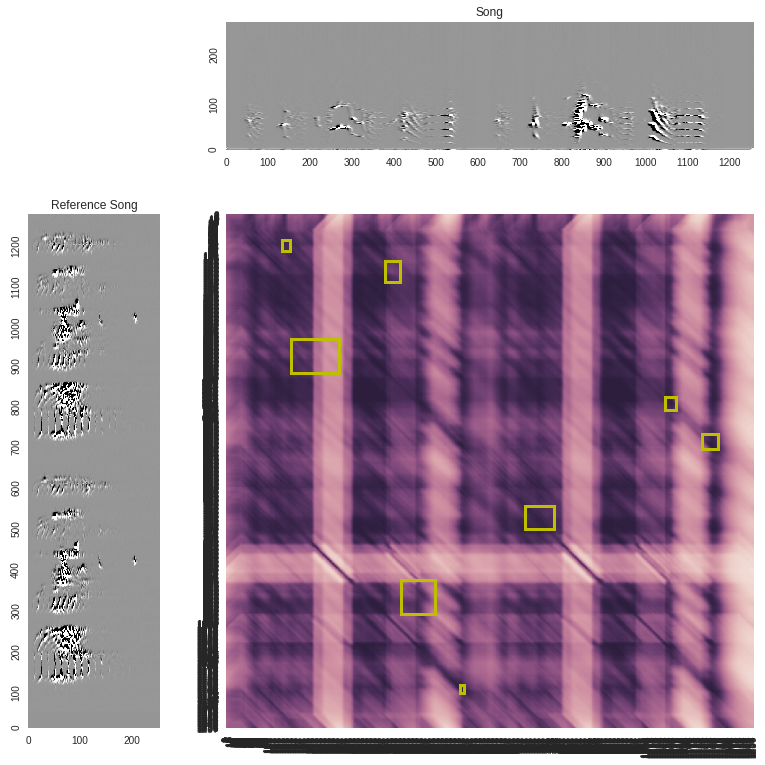

In [5]:
fig = bsa.similarity_plot(sim, synth, tutor)
plt.show(fig)

In [6]:
fstep = 40
fsize = 1024

In [7]:
sdt = bsa.spectral_derivs(tutor, 256, fstep, fsize)
sds = bsa.spectral_derivs(synth, 256, fstep, fsize)

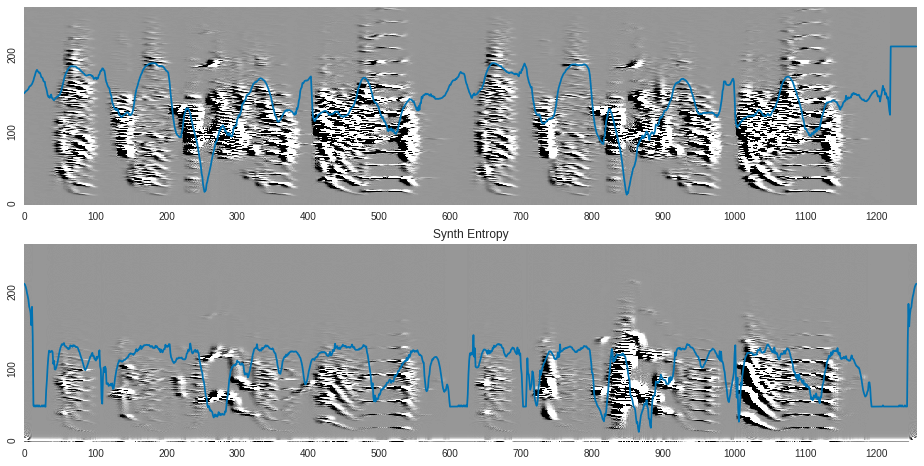

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8))
ax1 = bsa.spectral_derivs_plot(sdt, contrast=0.01, ax=ax1)
bsa.plot_over_spec(bsa.song_wiener_entropy(tutor, 256, fstep, fsize), ax1)

ax2 = bsa.spectral_derivs_plot(sds, contrast=0.01, ax=ax2)
bsa.plot_over_spec(bsa.song_wiener_entropy(synth, 256, fstep, fsize), ax2)
ax2.set_title('Synth Entropy')
plt.show(fig)

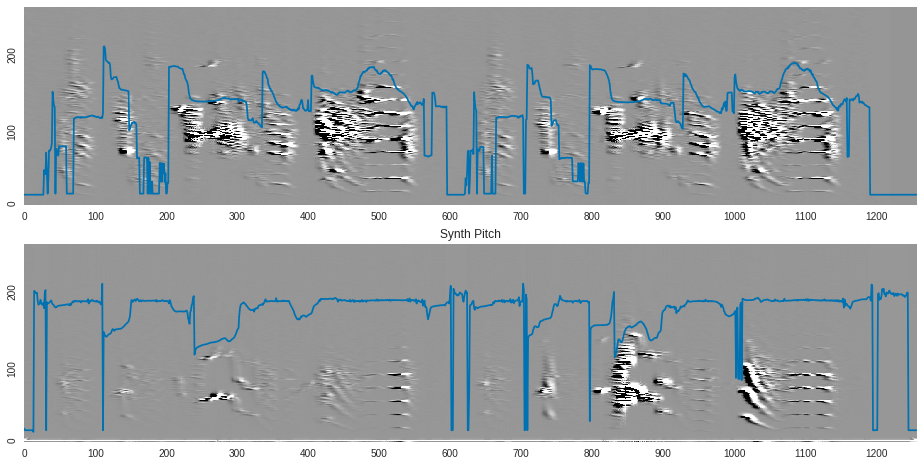

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8))
ax1 = bsa.spectral_derivs_plot(sdt, ax=ax1)
bsa.plot_over_spec(bsa.song_pitch(tutor, sr, 0.8, 256, fstep, fsize), ax1)

pitch = bsa.song_pitch(synth, sr, 0.8, 256, fstep, fsize)
ax2 = bsa.spectral_derivs_plot(sds, ax=ax2)
bsa.plot_over_spec(pitch, ax2)
ax2.set_title('Synth Pitch')
plt.show(fig)

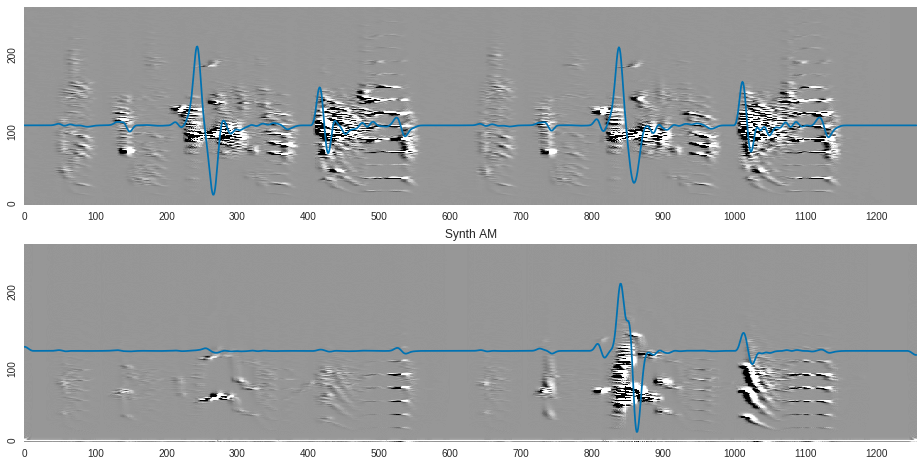

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8))
ax1 = bsa.spectral_derivs_plot(sdt, ax=ax1)
bsa.plot_over_spec(bsa.song_amplitude_modulation(tutor, 256, fstep, fsize), ax1)

ax2 = bsa.spectral_derivs_plot(sds, ax=ax2)
bsa.plot_over_spec(bsa.song_amplitude_modulation(synth, 256, fstep, fsize), ax2)
ax2.set_title('Synth AM')

plt.show(fig)

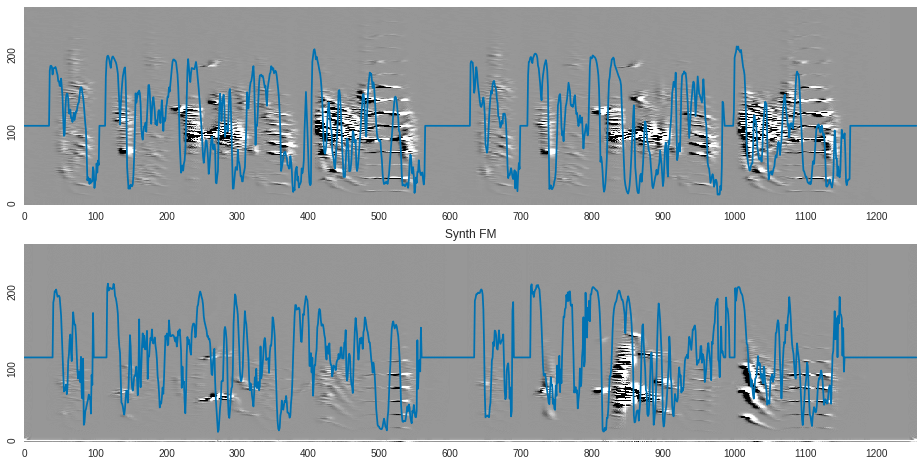

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8))
ax1 = bsa.spectral_derivs_plot(sdt, ax=ax1)
fm = bsa.song_frequency_modulation(tutor, 256, fstep, fsize)
fm[bsa.song_amplitude(tutor, 256, fstep, fsize) < 60] = np.median(fm[bsa.song_amplitude(tutor, 256, fstep, fsize) > 60])
bsa.plot_over_spec(fm, ax1)

ax2 = bsa.spectral_derivs_plot(sds, ax=ax2)
fm = bsa.song_frequency_modulation(synth, 256, fstep, fsize)
fm[bsa.song_amplitude(synth, 256, fstep, fsize) < 60] = np.median(fm[bsa.song_amplitude(synth, 256, fstep, fsize) > 60])
bsa.plot_over_spec(fm, ax2)
ax2.set_title('Synth FM')
plt.show(fig)

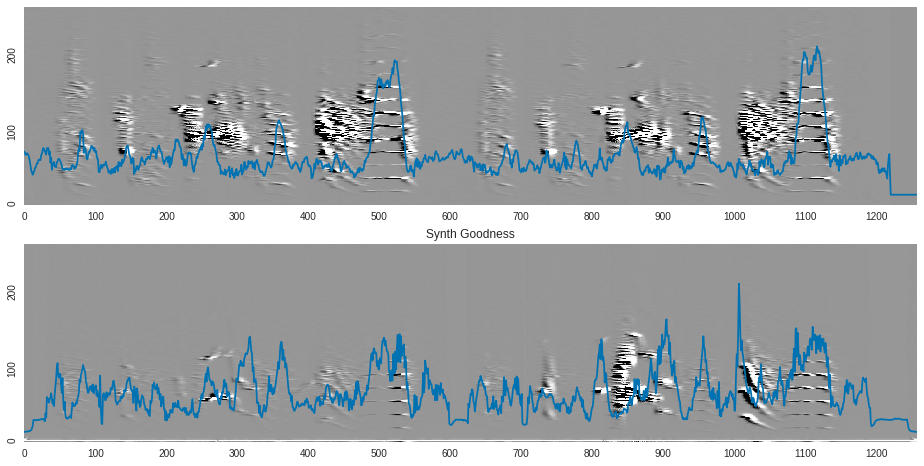

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8))
ax1 = bsa.spectral_derivs_plot(sdt, ax=ax1)
bsa.plot_over_spec(bsa.song_goodness(tutor, 256, fstep, fsize), ax1)

ax2 = bsa.spectral_derivs_plot(sds, ax=ax2)
bsa.plot_over_spec(bsa.song_goodness(synth, 256, fstep, fsize), ax2)
ax2.set_title('Synth Goodness')
plt.show(fig)

# Let see for one syllable

In [141]:
sr, tutor = wavfile.read('../data/ba_syllable_a.wav')
sr, synth = wavfile.read('../data/ba_syllable_a_out.wav')
sr, hillc = wavfile.read('../model/hillclimbing/res/170301_1548_syl_b_dtw/out_0_242.9760634639013.wav')

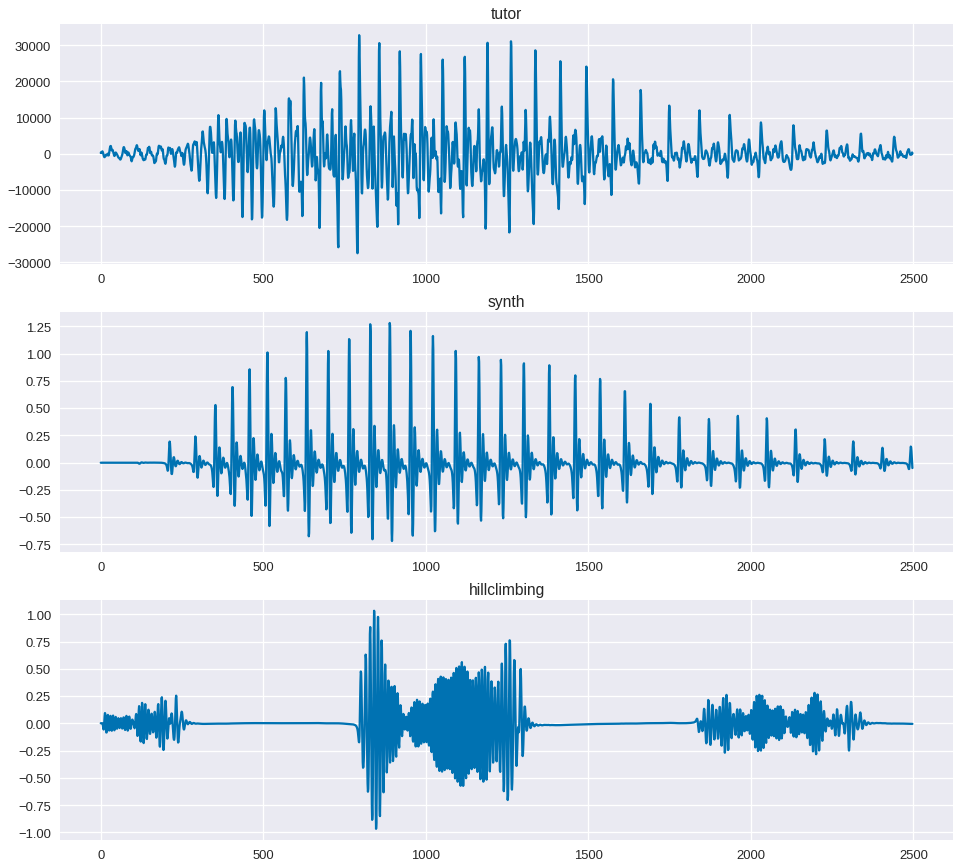

In [142]:
fig, axs = plt.subplots(3, 1, figsize=(16, 5*3))
axs[0].plot(tutor)
axs[0].set_title('tutor')
axs[1].plot(synth - np.mean(synth))
axs[1].set_title('synth')
axs[2].plot(hillc - np.mean(hillc))
axs[2].set_title('hillclimbing')
plt.show()

In [145]:
fsize = 1024
fstep = 40
tfeat = bsa.all_song_features(tutor, sr, pitch_threshold=0.8, fft_size=fsize, fft_step=fstep)
sfeat = bsa.all_song_features(synth, sr, pitch_threshold=0.8, fft_size=fsize, fft_step=fstep)
hfeat = bsa.all_song_features(hillc, sr, pitch_threshold=0.8, fft_size=fsize, fft_step=fstep)

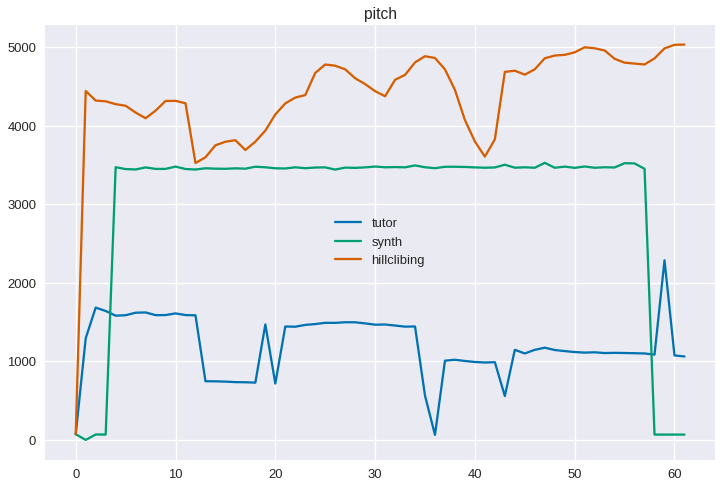

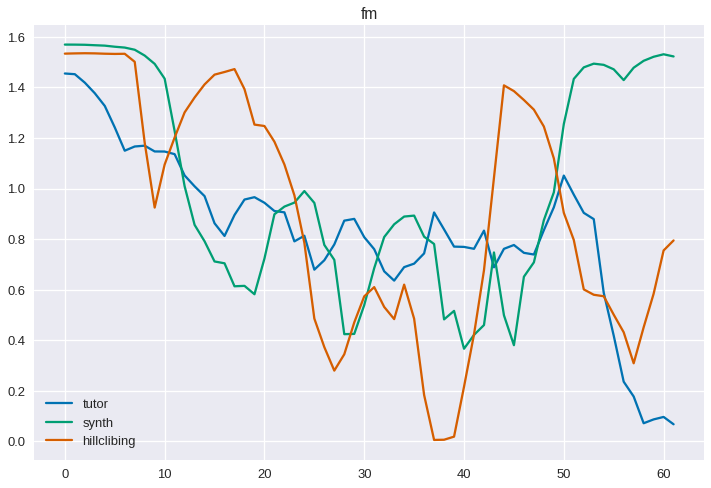

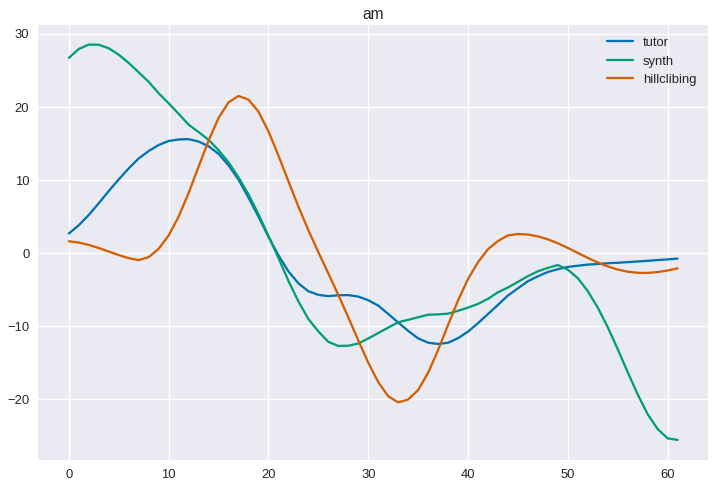

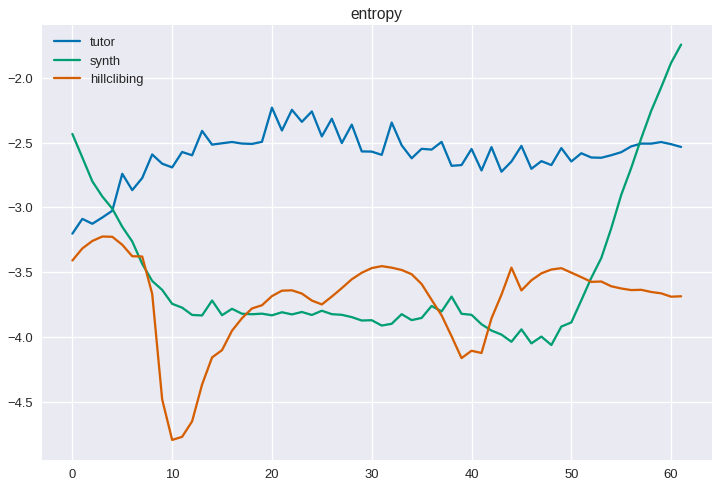

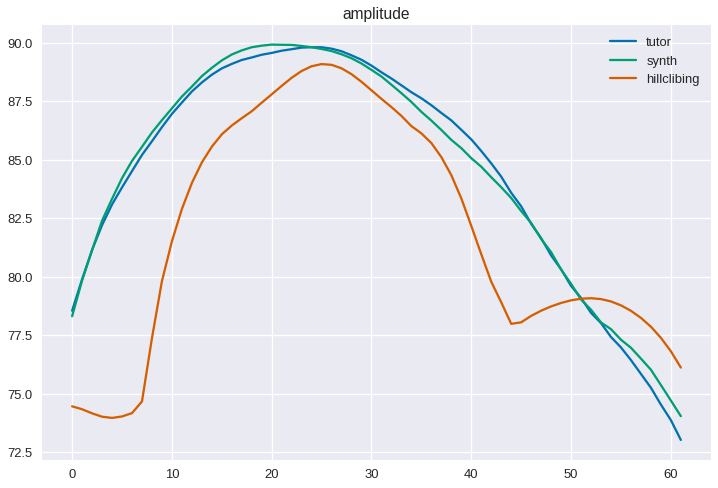

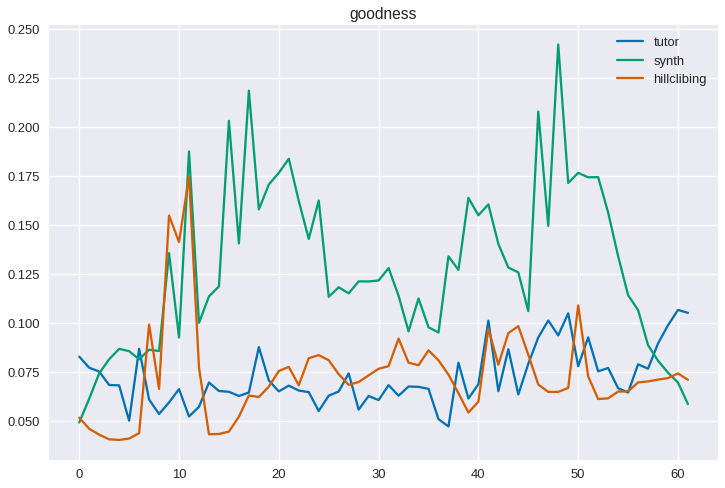

In [146]:
sns.set_context('talk')

for fname in tfeat:
    plt.figure(figsize=(12, 12/(1.5)))
    plt.plot(tfeat[fname], label='tutor')
    plt.plot(sfeat[fname], label='synth')
    plt.plot(hfeat[fname], label='hillclibing')
    plt.legend()
    plt.title(fname)
    plt.show()

In [147]:
for fname in tfeat:
    print("*" * 40)
    print(fname)
    print('tutor: mean: {}, std: {}'.format(np.mean(tfeat[fname]), np.std(tfeat[fname])))
    print('synth: mean: {}, std: {}'.format(np.mean(sfeat[fname]), np.std(sfeat[fname])))
    print('hill: mean: {}, std: {}'.format(np.mean(hfeat[fname]), np.std(hfeat[fname])))

****************************************
pitch
tutor: mean: 1205.264207532329, std: 389.5370580562992
synth: mean: 3031.1674161111155, std: 1143.6044752842186
hill: mean: 4385.079247382379, std: 693.4386010537252
****************************************
fm
tutor: mean: 0.8373612427373196, std: 0.31580837273317935
synth: mean: 1.0129892470259683, std: 0.411453875058047
hill: mean: 0.9026039142634589, std: 0.470433543554171
****************************************
am
tutor: mean: -0.023714758122573797, std: 8.443204212417363
synth: mean: 0.17605122179513863, std: 15.279649822512342
hill: mean: -0.024541651708346473, std: 9.961560624533622
****************************************
entropy
tutor: mean: -2.591305999075026, std: 0.1959407728235846
synth: mean: -3.5287664822601292, std: 0.5707371851134444
hill: mean: -3.713765987083895, std: 0.3453175406811591
****************************************
amplitude
tutor: mean: 84.5303304280705, std: 4.892904655245998
synth: mean: 84.58207206375971